In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

In [ ]:
def get_files(path, train=True):
  images = {}

  if train:
    path = path + '/Training/'
  else:
    path = path + '/Test/'

  for folder in os.listdir(path):
    category = []
    for filename in os.listdir(path + folder):
      img = cv2.imread(path + folder + '/' + filename)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      category.append(gray)
    images[folder] = category

  return images

In [ ]:
# change path to point to your data directory
path = 'drive/MyDrive/Colab Notebooks/dataset'
images = get_files(path)

In [ ]:
# def extract_features(images):
  
#   descriptor_list = []
#   sift = cv2.xfeatures2d.SIFT_create()
#   for k,v in images.items():
#     for img in v:
#       kp, des = sift.detectAndCompute(img, None) #keypoints, descriptor
#       descriptor_list.extend(des)

#   return descriptor_list

def extract_features(images):
  sift_vectors = {}
  descriptor_list = []
  sift = cv2.xfeatures2d.SIFT_create()

  for k,v in images.items():
    features = []
    for img in v:
      kp, des = sift.detectAndCompute(img, None)
      descriptor_list.extend(des)
      features.append(des)
    sift_vectors[k] = features
  return descriptor_list, sift_vectors


In [ ]:
descriptor_list, bovw_features = extract_features(images)

In [ ]:
def cluster_descriptors(k, descriptor_list):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(descriptor_list)
  visual_vocab = kmeans.cluster_centers_
  return visual_vocab

In [ ]:
visual_vocab = cluster_descriptors(500, descriptor_list)

In [ ]:
visual_vocab

array([[ 9.79399142, 10.6695279 , 31.09871245, ...,  4.80257511,
         4.49785408,  8.67811159],
       [37.7739726 , 11.73972603,  8.06164384, ..., 13.92465753,
        10.23972603, 12.49315068],
       [23.72093023, 13.79651163, 12.78488372, ..., 13.29651163,
         3.18023256, 19.31976744],
       ...,
       [12.59241706, 12.01421801,  4.91469194, ...,  8.63033175,
         7.30331754, 11.20853081],
       [85.89861751, 12.48847926,  6.94009217, ...,  2.52534562,
         1.99539171, 10.17511521],
       [ 5.53191489,  2.96276596,  4.69148936, ..., 12.35638298,
        12.62765957, 11.92553191]])

### step 3
Image representation with a histogram of codewords
* Calculate the Euclidian distance between image descriptors and codewords, i.e., the cluster centres.

* Assign each descriptor in the training and test images to the nearest codeword cluster.

* Visualize some image patches that are assigned to the same codeword.

* Represent each image in the training and the test dataset as a histogram of visual words, i.e., using the Bag of Words representation. Normalize the histograms by their L1 norm.

### 3.1 & 3.2


In [ ]:
# Calculate the Euclidian distance between image descriptors and codewords, i.e., the cluster centres.

# Find for each feature (by index)
# the distance to the closest cluster center
# provided by the k means algorithm
def distance_to_centers(centers, features):
  matches = {}
  # feature_index = index in features
  for feature_index, feature in enumerate(features):
    min_dist = 9999999999999999999
    selected_cluster_center = -1
    # index = cluster index 
    for index,center in enumerate(centers):
      dist = np.linalg.norm(center-feature)
      if dist < min_dist:
        min_dist = dist
        selected_cluster_center=index
    
    if not selected_cluster_center in matches:
      matches[selected_cluster_center]=[] 
    matches[selected_cluster_center].append(feature_index)

  return matches


# to make it run fast
matches = distance_to_centers(visual_vocab[:500], descriptor_list[:500])
# matches = distance_to_centers(visual_vocab, descriptor_list)

### 3.3
for each cluster centre, we itterate through the features that are parts of this cluster.
not completed due to lack of visualisation -- visualise features in images 

2 problems
1. Which image does this feature belong to that we are visualising?
2. Where do we get X,y information from for each feature?

In [ ]:
for cluster_center in matches:
  features_in_cluster = matches[cluster_center]
  for feature_index in features_in_cluster:
    next_feature = descriptor_list[feature_index]
    print(next_feature)
    break
  break

[  0.   0.   1.   0.   0.   0.   0.   0.  98.  31.  21.   2.   0.   0.
   0.   0. 176.  39.   2.   0.   0.   0.   0.  18.  75.   3.   0.   0.
   0.   0.   0.  17.   0.   0.   1.   0.   0.   0.   0.   0.  99.  53.
  48.   6.   0.   0.  28.  35. 176.  79.   5.   0.   0.   0.   6.  64.
  96.   8.   0.   0.   1.   0.   0.  14.   0.   0.   0.   0.   0.   0.
   1.   0.  25.   3.   3.   0.   0.   0. 176. 165. 176.   3.   0.   0.
   0.   0.  92. 176.  43.   0.   0.   0.   6.   2.   2.  38.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  57.  42.
  14.   0.   0.   0.   0.   0.  24.  73.  12.   0.   0.   0.   3.   5.
   1.  13.]


### 3.4

In [ ]:
def construct_histogram(descriptor_list, visual_vocab, kmeans):
  histogram = np.zeros(len(visual_vocab))
  cluster_result = kmeans.predict(discriptor_list)
  for i in cluster_result:
    histogram[i] += 1.0
  return histogram


In [ ]:
histogram = construct_histogram(descriptor_list, visual_vocab, kmeans)

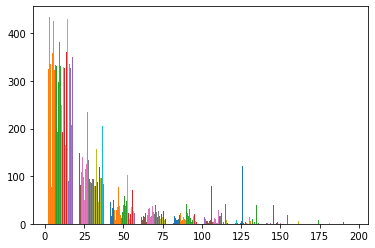

In [ ]:
plt.hist(visual_vocab)
plt.show()

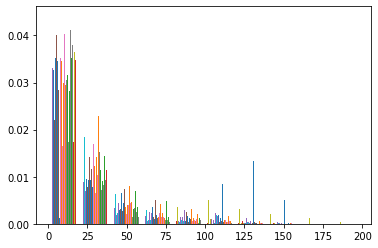

In [ ]:
plt.hist(visual_vocab, density=True) # normliased to L1
plt.show()